# 6893-Model_LGBM and data exploring for visualization
### -- Google Analytics Customer Revenue Prediction 
[dataset](https://www.kaggle.com/c/ga-customer-revenue-prediction/data)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import gc
import time
from pandas.core.common import SettingWithCopyWarning
import warnings
import lightgbm as lgb
from sklearn.model_selection import GroupKFold
import numpy
import torch.nn
import torch.nn.functional
from torch.utils.data import Dataset, DataLoader
import torch.optim
import numpy.random
import numpy as np
import math
import pandas as pd
import copy
import time
from sklearn.preprocessing import LabelEncoder
import torch.nn
import torch.nn.functional
import torch.optim
import numpy.random
import math
import pandas
from sklearn.preprocessing import LabelEncoder


In [2]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
data = pd.read_csv("/home/ecbm4040/big_data_project/new_data.csv")

/home/ecbm4040/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,31,40,43,44,45,48,49,61,68,69,70,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data

,Unnamed: 0,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,hits_appInfo.exitScreenName,hits_appInfo.landingScreenName,hits_appInfo.screenName,hits_contentGroup.contentGroup2,hits_contentGroup.contentGroupUniqueViews1,hits_contentGroup.contentGroupUniqueViews2,hits_contentGroup.contentGroupUniqueViews3,hits_dataSource,hits_eCommerceAction.option,hits_eventInfo.eventAction,hits_eventInfo.eventCategory,hits_eventInfo.eventLabel,hits_hour,hits_isExit,hits_item.currencyCode,hits_latencyTracking.domContentLoadedTime,hits_latencyTracking.domInteractiveTime,hits_latencyTracking.domLatencyMetricsSample,hits_latencyTracking.pageDownloadTime,hits_latencyTracking.pageLoadSample,hits_latencyTracking.pageLoadTime,hits_latencyTracking.redirectionTime,hits_latencyTracking.serverConnectionTime,hits_latencyTracking.serverResponseTime,hits_latencyTracking.speedMetricsSample,hits_minute,hits_page.hostname,hits_page.pagePath,hits_page.pagePathLevel1,hits_page.pagePathLevel2,hits_page.pagePathLevel3,hits_page.pageTitle,hits_page.searchCategory,hits_page.searchKeyword,hits_promotionActionInfo.promoIsClick,hits_promotionActionInfo.promoIsView,hits_referer,hits_social.hasSocialSourceReferral,hits_social.socialNetwork,hits_transaction.currencyCode,customDimensions_index,customDimensions_value,y
0,0,Referral,20180223,8111333210792218028,1.519416e+09,1,1.519416e+09,Chrome,desktop,Macintosh,London,Americas,United States,London,verizon.net,England,Northern America,0.0,37.0,1.0,24.0,81.0,2400.0,18.474885,1.0,0,0,0,0,0.0,0,0,0,(none),/,(direct),shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,11,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America,18.474885
1,1,Organic Search,20180223,6821979272477799804,1.519440e+09,1,1.519440e+09,Chrome,desktop,Macintosh,Seattle,Americas,United States,Seattle-Tacoma WA,spectrumnet.us,Washington,Northern America,0.0,39.0,1.0,30.0,59.0,1307.0,0.000000,0.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,shop.googlemerchandisestore.com/google+redesig...,www.googlemerchandisestore.com/home,www.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,18,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,www.googlemerchandisestore.com,/home,/home,0,0,Google Online Store,0,0,0,0,https://www.google.com/,No,(not set),0,4.0,North America,0.000000
2,2,Referral,20180223,3294419200785362461,1.519418e+09,3,1.519418e+09,Chrome,desktop,Windows,New York,Americas,United States,New York NY,(not set),New York,Northern America,0.0,39.0,0.0,30.0,78.0,969.0,0.000000,0.0,0,0,0,0,0.0,0,True,0,(none),/,(direct),shop.googlemerchandisestore.com/myaccount.html...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America,0.000000
3,3,Organic Search,20180223,4021719711274238069,1.519455e+09,2,1.519455e+09,Safari,tablet,iOS,not available in demo dataset,Oceania,Australia,not available in demo dataset,tpgi.com.au,not ava

# data exploring for visualization

In [ ]:
gdf =data.groupby("fullVisitorId")["totals_transactionRevenue"].sum().reset_index()

In [6]:
data.fullVisitorId.nunique()

1351273

In [7]:
data = data.drop_duplicates('fullVisitorId')

In [9]:
len(data)

1351273

In [10]:
data.groupby(['customDimensions_value']).size()

customDimensions_value
0                  546691
0                  184601
APAC               109196
Central America     11664
EMEA               154175
North America      323301
South America       21645
dtype: int64

In [5]:
dt1=data.groupby(['geoNetwork_metro']).size().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(50)

In [10]:
dt2=dt1.drop([122, 0])

In [11]:
dt2

,geoNetwork_metro,count
100,San Francisco-Oakland-San Jose CA,182745
75,New York NY,50419
60,London,23643
61,Los Angeles CA,19953
19,Chicago IL,15300
101,Seattle-Tacoma WA,15251
6,Austin TX,7289
116,Washington DC (Hagerstown MD),7021
10,Boston MA-Manchester NH,5868
26,Dallas-Ft. Worth TX,5787


In [17]:
to_add=dt2['geoNetwork_metro'].str.extract(r'([A-Z][A-Z])', expand = False)

In [24]:
to_add

100     CA
75      NY
60     NaN
61      CA
19      IL
101     WA
6       TX
116     DC
10      MA
26      TX
46      TX
4       GA
30      MI
50      JP
99      CA
85      PA
93      VA
28      CO
87      PA
16      NC
88      OR
86      AZ
82      FL
98      TX
79     NaN
68      FL
25      OH
73      TN
55      WI
71      MN
48      IN
69     NaN
51      JP
109     FL
81      NE
37      MI
121    NaN
22      OH
97      UT
90      NC
67     NaN
96      CA
54      MO
21      OH
43      TX
66      TN
47      ID
56      MI
Name: geoNetwork_metro, dtype: object

In [26]:
dt3 = pd.concat([dt2, to_add], axis = 1)

In [28]:
dt3.columns=['city','count','state']

In [29]:
dt3

,city,count,state
100,San Francisco-Oakland-San Jose CA,182745,CA
75,New York NY,50419,NY
60,London,23643,NaN
61,Los Angeles CA,19953,CA
19,Chicago IL,15300,IL
101,Seattle-Tacoma WA,15251,WA
6,Austin TX,7289,TX
116,Washington DC (Hagerstown MD),7021,DC
10,Boston MA-Manchester NH,5868,MA
26,Dallas-Ft. Worth TX,5787,TX


In [30]:
dt4 = dt3.groupby("state")["count"].sum().reset_index()

In [31]:
dt4

,state,count
0,AZ,1508
1,CA,206417
2,CO,2572
3,DC,7021
4,FL,2632
5,GA,5464
6,ID,167
7,IL,15300
8,IN,580
9,JP,4804


In [ ]:
df2['state'] = p.Series(np.random.randn(sLength), index=df1.index)

In [9]:
dt1

,geoNetwork_metro,count
122,not available in demo dataset,932959
0,(not set),386896
100,San Francisco-Oakland-San Jose CA,182745
75,New York NY,50419
60,London,23643
61,Los Angeles CA,19953
19,Chicago IL,15300
101,Seattle-Tacoma WA,15251
6,Austin TX,7289
116,Washington DC (Hagerstown MD),7021


In [18]:
dt=data.groupby(['geoNetwork_country']).size().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(50)

In [19]:
dt

,geoNetwork_country,count
218,United States,509218
93,India,91584
217,United Kingdom,62111
36,Canada,39142
75,Germany,33050
223,Vietnam,32490
28,Brazil,30832
102,Japan,30057
204,Thailand,27269
210,Turkey,26952


In [3]:
data = pd.read_csv("/home/ecbm4040/big_data_project/train_cleaned.csv")
data["totals_transactionRevenue"] = data["totals_transactionRevenue"].apply(lambda x: math.log(1 + x))

/home/ecbm4040/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,30,39,42,43,44,47,48,60,67,68,69,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,hits_appInfo.exitScreenName,hits_appInfo.landingScreenName,hits_appInfo.screenName,hits_contentGroup.contentGroup2,hits_contentGroup.contentGroupUniqueViews1,hits_contentGroup.contentGroupUniqueViews2,hits_contentGroup.contentGroupUniqueViews3,hits_dataSource,hits_eCommerceAction.option,hits_eventInfo.eventAction,hits_eventInfo.eventCategory,hits_eventInfo.eventLabel,hits_hour,hits_isExit,hits_item.currencyCode,hits_latencyTracking.domContentLoadedTime,hits_latencyTracking.domInteractiveTime,hits_latencyTracking.domLatencyMetricsSample,hits_latencyTracking.pageDownloadTime,hits_latencyTracking.pageLoadSample,hits_latencyTracking.pageLoadTime,hits_latencyTracking.redirectionTime,hits_latencyTracking.serverConnectionTime,hits_latencyTracking.serverResponseTime,hits_latencyTracking.speedMetricsSample,hits_minute,hits_page.hostname,hits_page.pagePath,hits_page.pagePathLevel1,hits_page.pagePathLevel2,hits_page.pagePathLevel3,hits_page.pageTitle,hits_page.searchCategory,hits_page.searchKeyword,hits_promotionActionInfo.promoIsClick,hits_promotionActionInfo.promoIsView,hits_referer,hits_social.hasSocialSourceReferral,hits_social.socialNetwork,hits_transaction.currencyCode,customDimensions_index,customDimensions_value,y
0,Referral,20180223,8111333210792218028,1.51942e+09,1,1.51942e+09,Chrome,desktop,Macintosh,London,Americas,United States,London,verizon.net,England,Northern America,0.0,37.0,1.0,24.0,81.0,2400.0,18.474885,1.0,0,0,0,0,0.0,0,0,0,(none),/,(direct),shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,11,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America,18.474885
1,Organic Search,20180223,6821979272477799804,1.51944e+09,1,1.51944e+09,Chrome,desktop,Macintosh,Seattle,Americas,United States,Seattle-Tacoma WA,spectrumnet.us,Washington,Northern America,0.0,39.0,1.0,30.0,59.0,1307.0,0.000000,0.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,shop.googlemerchandisestore.com/google+redesig...,www.googlemerchandisestore.com/home,www.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,18,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,www.googlemerchandisestore.com,/home,/home,0,0,Google Online Store,0,0,0,0,https://www.google.com/,No,(not set),0,4.0,North America,0.000000
2,Referral,20180223,3294419200785362461,1.51942e+09,3,1.51942e+09,Chrome,desktop,Windows,New York,Americas,United States,New York NY,(not set),New York,Northern America,0.0,39.0,0.0,30.0,78.0,969.0,0.000000,0.0,0,0,0,0,0.0,0,True,0,(none),/,(direct),shop.googlemerchandisestore.com/myaccount.html...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America,0.000000
3,Organic Search,20180223,4021719711274238069,1.51945e+09,2,1.51945e+09,Safari,tablet,iOS,not available in demo dataset,Oceania,Australia,not available in demo dataset,tpgi.com.au,not available in demo dataset,Aust

In [5]:
msk = numpy.random.rand(len(data)) < 0.8
training_data = data[msk]
testing_data = data[~msk]

In [6]:
training_data.shape,testing_data.shape

((1366437, 78), (341908, 78))

In [ ]:
#data exploring

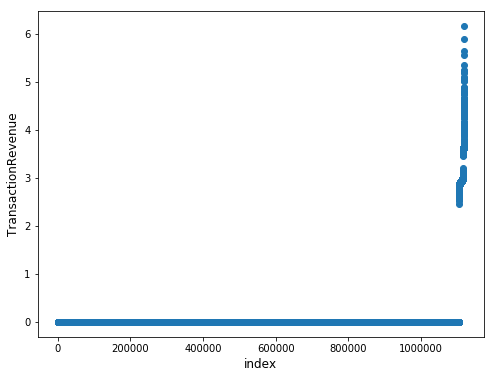

In [8]:
training_data["totals_transactionRevenue"] = training_data["totals_transactionRevenue"].astype('float')
gdf = training_data.groupby("fullVisitorId")["totals_transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals_transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()
#analysis

In [9]:
nzi = pd.notnull(training_data["totals_transactionRevenue"]).sum()
nzr = (gdf["totals_transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / training_data.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

Number of instances in train set with non-zero revenue :  1366437  and ratio is :  1.0
Number of unique customers with non-zero revenue :  13396 and the ratio is :  0.011981918001320193


In [10]:
print("Number of unique visitors in train set : ",training_data.fullVisitorId.nunique(), " out of rows : ",training_data.shape[0])
print("Number of unique visitors in test set : ",testing_data.fullVisitorId.nunique(), " out of rows : ",testing_data.shape[0])
print("Number of common visitors in train and test set : ",len(set(training_data.fullVisitorId.unique()).intersection(set(testing_data.fullVisitorId.unique())) ))

Number of unique visitors in train set :  1118018  out of rows :  1366437
Number of unique visitors in test set :  314773  out of rows :  341908
Number of common visitors in train and test set :  73306


In [11]:
const_cols = [c for c in training_data.columns if training_data[c].nunique(dropna=False)==1 ]
const_cols

[]

# data's final cleaning for LGBM above

In [38]:
const_cols = [c for c in training_data.columns if training_data[c].nunique(dropna=False)==1 ]
const_cols

[]

In [39]:
data

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,hits_appInfo.exitScreenName,hits_appInfo.landingScreenName,hits_appInfo.screenName,hits_contentGroup.contentGroup2,hits_contentGroup.contentGroupUniqueViews1,hits_contentGroup.contentGroupUniqueViews2,hits_contentGroup.contentGroupUniqueViews3,hits_dataSource,hits_eCommerceAction.option,hits_eventInfo.eventAction,hits_eventInfo.eventCategory,hits_eventInfo.eventLabel,hits_hour,hits_isExit,hits_item.currencyCode,hits_latencyTracking.domContentLoadedTime,hits_latencyTracking.domInteractiveTime,hits_latencyTracking.domLatencyMetricsSample,hits_latencyTracking.pageDownloadTime,hits_latencyTracking.pageLoadSample,hits_latencyTracking.pageLoadTime,hits_latencyTracking.redirectionTime,hits_latencyTracking.serverConnectionTime,hits_latencyTracking.serverResponseTime,hits_latencyTracking.speedMetricsSample,hits_minute,hits_page.hostname,hits_page.pagePath,hits_page.pagePathLevel1,hits_page.pagePathLevel2,hits_page.pagePathLevel3,hits_page.pageTitle,hits_page.searchCategory,hits_page.searchKeyword,hits_promotionActionInfo.promoIsClick,hits_promotionActionInfo.promoIsView,hits_referer,hits_social.hasSocialSourceReferral,hits_social.socialNetwork,hits_transaction.currencyCode,customDimensions_index,customDimensions_value,y
0,Referral,20180223,8111333210792218028,1.51942e+09,1,1.51942e+09,Chrome,desktop,Macintosh,London,Americas,United States,London,verizon.net,England,Northern America,0.0,37.0,1.0,24.0,81.0,2400.0,18.474885,1.0,0,0,0,0,0.0,0,0,0,(none),/,(direct),shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,11,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America,18.474885
1,Organic Search,20180223,6821979272477799804,1.51944e+09,1,1.51944e+09,Chrome,desktop,Macintosh,Seattle,Americas,United States,Seattle-Tacoma WA,spectrumnet.us,Washington,Northern America,0.0,39.0,1.0,30.0,59.0,1307.0,0.000000,0.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,shop.googlemerchandisestore.com/google+redesig...,www.googlemerchandisestore.com/home,www.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,18,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,www.googlemerchandisestore.com,/home,/home,0,0,Google Online Store,0,0,0,0,https://www.google.com/,No,(not set),0,4.0,North America,0.000000
2,Referral,20180223,3294419200785362461,1.51942e+09,3,1.51942e+09,Chrome,desktop,Windows,New York,Americas,United States,New York NY,(not set),New York,Northern America,0.0,39.0,0.0,30.0,78.0,969.0,0.000000,0.0,0,0,0,0,0.0,0,True,0,(none),/,(direct),shop.googlemerchandisestore.com/myaccount.html...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America,0.000000
3,Organic Search,20180223,4021719711274238069,1.51945e+09,2,1.51945e+09,Safari,tablet,iOS,not available in demo dataset,Oceania,Australia,not available in demo dataset,tpgi.com.au,not available in demo dataset,Aust

In [13]:
t = test[num_cols].loc[test['visitStartTime'].isin(['EMEA'])]
t

NameError: name 'test' is not defined

In [14]:
test = data.drop([data.index[190514], data.index[194851],data.index[1170217],data.index[1189161],data.index[1265764]])

In [15]:
test = test.drop([test.index[389560], test.index[465782]])

In [16]:
test = test.drop([test.index[1063744]])

In [17]:
test.shape

(1708337, 78)

In [18]:
test.to_csv('/home/ecbm4040/big_data_project/new_data.csv')

KeyboardInterrupt: 

# Below dt is going to be used in LGBM model!

In [20]:
dt=test

In [24]:
dt

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,hits_appInfo.exitScreenName,hits_appInfo.landingScreenName,hits_appInfo.screenName,hits_contentGroup.contentGroup2,hits_contentGroup.contentGroupUniqueViews1,hits_contentGroup.contentGroupUniqueViews2,hits_contentGroup.contentGroupUniqueViews3,hits_dataSource,hits_eCommerceAction.option,hits_eventInfo.eventAction,hits_eventInfo.eventCategory,hits_eventInfo.eventLabel,hits_hour,hits_isExit,hits_item.currencyCode,hits_latencyTracking.domContentLoadedTime,hits_latencyTracking.domInteractiveTime,hits_latencyTracking.domLatencyMetricsSample,hits_latencyTracking.pageDownloadTime,hits_latencyTracking.pageLoadSample,hits_latencyTracking.pageLoadTime,hits_latencyTracking.redirectionTime,hits_latencyTracking.serverConnectionTime,hits_latencyTracking.serverResponseTime,hits_latencyTracking.speedMetricsSample,hits_minute,hits_page.hostname,hits_page.pagePath,hits_page.pagePathLevel1,hits_page.pagePathLevel2,hits_page.pagePathLevel3,hits_page.pageTitle,hits_page.searchCategory,hits_page.searchKeyword,hits_promotionActionInfo.promoIsClick,hits_promotionActionInfo.promoIsView,hits_referer,hits_social.hasSocialSourceReferral,hits_social.socialNetwork,hits_transaction.currencyCode,customDimensions_index,customDimensions_value,y
0,Referral,20180223,8111333210792218028,1.51942e+09,1,1.51942e+09,Chrome,desktop,Macintosh,London,Americas,United States,London,verizon.net,England,Northern America,0.0,37.0,1.0,24.0,81.0,2400.0,18.474885,1.0,0,0,0,0,0.0,0,0,0,(none),/,(direct),shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,11,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America,18.474885
1,Organic Search,20180223,6821979272477799804,1.51944e+09,1,1.51944e+09,Chrome,desktop,Macintosh,Seattle,Americas,United States,Seattle-Tacoma WA,spectrumnet.us,Washington,Northern America,0.0,39.0,1.0,30.0,59.0,1307.0,0.000000,0.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,shop.googlemerchandisestore.com/google+redesig...,www.googlemerchandisestore.com/home,www.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,18,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,www.googlemerchandisestore.com,/home,/home,0,0,Google Online Store,0,0,0,0,https://www.google.com/,No,(not set),0,4.0,North America,0.000000
2,Referral,20180223,3294419200785362461,1.51942e+09,3,1.51942e+09,Chrome,desktop,Windows,New York,Americas,United States,New York NY,(not set),New York,Northern America,0.0,39.0,0.0,30.0,78.0,969.0,0.000000,0.0,0,0,0,0,0.0,0,True,0,(none),/,(direct),shop.googlemerchandisestore.com/myaccount.html...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America,0.000000
3,Organic Search,20180223,4021719711274238069,1.51945e+09,2,1.51945e+09,Safari,tablet,iOS,not available in demo dataset,Oceania,Australia,not available in demo dataset,tpgi.com.au,not available in demo dataset,Aust

In [21]:
msk = numpy.random.rand(len(dt)) < 0.8
training_data = dt[msk]
testing_data = dt[~msk]

In [ ]:
#lgbm modeling

In [22]:
# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device_browser", 
            "device_deviceCategory", "device_operatingSystem", 
            "geoNetwork_city", "geoNetwork_continent", 
            "geoNetwork_country", "geoNetwork_metro",
            "geoNetwork_networkDomain", "geoNetwork_region", 
            "geoNetwork_subContinent", "customDimensions_value"]
for col in cat_cols:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(training_data[col].values.astype('str')) + list(testing_data[col].values.astype('str')))
    training_data[col] = lbl.transform(list(training_data[col].values.astype('str')))
    testing_data[col] = lbl.transform(list(testing_data[col].values.astype('str')))


num_cols = ["totals_hits", "totals_pageviews", "visitNumber", "visitStartTime", 'totals_bounces',  'totals_newVisits']    
for col in num_cols:
    training_data[col] = training_data[col].astype(float)
    testing_data[col] = testing_data[col].astype(float)

channelGrouping
device_browser
device_deviceCategory
device_operatingSystem
geoNetwork_city
geoNetwork_continent
geoNetwork_country
geoNetwork_metro
geoNetwork_networkDomain
geoNetwork_region
geoNetwork_subContinent
customDimensions_value


In [ ]:
data[]

In [23]:
# Impute 0 for missing target values
# train_df["totals.transactionRevenue"].fillna(0, inplace=True)
# train_y = train_df["totals.transactionRevenue"].values
# train_id = train_df["fullVisitorId"].values
# test_id = test_df["fullVisitorId"].values


# # label encode the categorical variables and convert the numerical variables to float
# cat_cols = ["channelGrouping", "device.browser", 
#             "device.deviceCategory", "device.operatingSystem", 
#             "geoNetwork.city", "geoNetwork.continent", 
#             "geoNetwork.country", "geoNetwork.metro",
#             "geoNetwork.networkDomain", "geoNetwork.region", 
#             "geoNetwork.subContinent", "trafficSource.adContent", 
#             "trafficSource.adwordsClickInfo.adNetworkType", 
#             "trafficSource.adwordsClickInfo.gclId", 
#             "trafficSource.adwordsClickInfo.page", 
#             "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
#             "trafficSource.keyword", "trafficSource.medium", 
#             "trafficSource.referralPath", "trafficSource.source",
#             'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']
# for col in cat_cols:
#     print(col)
#     lbl = preprocessing.LabelEncoder()
#     lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
#     train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
#     test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))


# num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
# for col in num_cols:
#     train_df[col] = train_df[col].astype(float)
#     test_df[col] = test_df[col].astype(float)

# Split the train dataset into development and valid based on time 
# dev_df = train_df[train_df['date']<=datetime.date(2017,5,31)]
# val_df = train_df[train_df['date']>datetime.date(2017,5,31)]
# dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
# val_y = np.log1p(val_df["totals.transactionRevenue"].values)


msk = numpy.random.rand(len(training_data)) < 0.8
train_data = training_data[msk]
val_data = training_data[~msk]
train_y=train_data["y"]
train_data_x=train_data.drop(columns=["y"])
val_x=val_data.drop(columns=["y"])
val_y=val_data["y"]



train_data_x = train_data_x[cat_cols + num_cols] 
val_x = val_x[cat_cols + num_cols] 
test_X = testing_data.drop(columns=["y"])
test_X = test_X[cat_cols + num_cols] 

In [29]:
train_data_x

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,hits_appInfo.exitScreenName,hits_appInfo.landingScreenName,hits_appInfo.screenName,hits_contentGroup.contentGroup2,hits_contentGroup.contentGroupUniqueViews1,hits_contentGroup.contentGroupUniqueViews2,hits_contentGroup.contentGroupUniqueViews3,hits_dataSource,hits_eCommerceAction.option,hits_eventInfo.eventAction,hits_eventInfo.eventCategory,hits_eventInfo.eventLabel,hits_hour,hits_isExit,hits_item.currencyCode,hits_latencyTracking.domContentLoadedTime,hits_latencyTracking.domInteractiveTime,hits_latencyTracking.domLatencyMetricsSample,hits_latencyTracking.pageDownloadTime,hits_latencyTracking.pageLoadSample,hits_latencyTracking.pageLoadTime,hits_latencyTracking.redirectionTime,hits_latencyTracking.serverConnectionTime,hits_latencyTracking.serverResponseTime,hits_latencyTracking.speedMetricsSample,hits_minute,hits_page.hostname,hits_page.pagePath,hits_page.pagePathLevel1,hits_page.pagePathLevel2,hits_page.pagePathLevel3,hits_page.pageTitle,hits_page.searchCategory,hits_page.searchKeyword,hits_promotionActionInfo.promoIsClick,hits_promotionActionInfo.promoIsView,hits_referer,hits_social.hasSocialSourceReferral,hits_social.socialNetwork,hits_transaction.currencyCode,customDimensions_index,customDimensions_value
0,Referral,20180223,8111333210792218028,1.51942e+09,1,1.51942e+09,Chrome,desktop,Macintosh,London,Americas,United States,London,verizon.net,England,Northern America,0.0,37.0,1.0,24.0,81.0,2400.0,18.474885,1.0,0,0,0,0,0.0,0,0,0,(none),/,(direct),shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,11,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America
4,Organic Search,20180223,9641057345301469522,1.51941e+09,1,1.51941e+09,Chrome,desktop,Linux,Sunnyvale,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,0.0,41.0,1.0,30.0,60.0,687.0,0.000000,0.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,www.googlemerchandisestore.com/home,www.googlemerchandisestore.com/home,www.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,www.googlemerchandisestore.com,/home,/home,0,0,Google Online Store,0,0,0,0,https://www.google.com/,No,(not set),0,4.0,North America
6,Organic Search,20180223,264252789138701490,1.51937e+09,1,1.51937e+09,Chrome,mobile,Android,Tampa,Americas,United States,Tampa-St. Petersburg (Sarasota) FL,(not set),Florida,Northern America,0.0,42.0,1.0,27.0,45.0,1312.0,18.777866,1.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,shop.googlemerchandisestore.com/signin.html,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,http://www.google.com/,No,(not set),0,4.0,North America
7,Referral,20180223,5197617341240944911,1.51941e+09,1,1.51941e+09,Chrome,desktop,Macintosh,New York,Americas,United States,New York NY,(not set),New York,Northern America,0.0,43.0,1.0,28.0,64.0,515.0,0.000000,0.0,0,0,0,0,0.0,0,0,0

In [31]:
train_y

0          18.474885
4           0.000000
6          18.777866
7           0.000000
8           0.000000
9           0.000000
10          0.000000
12         17.839611
13         16.993148
14          0.000000
16          0.000000
18          0.000000
19         17.392900
21          0.000000
23          0.000000
24          0.000000
26          0.000000
27          0.000000
28          0.000000
30          0.000000
32          0.000000
33          0.000000
34          0.000000
35          0.000000
37          0.000000
40          0.000000
41          0.000000
42          0.000000
44          0.000000
46          0.000000
             ...    
1708299     0.000000
1708302     0.000000
1708303     0.000000
1708306     0.000000
1708307     0.000000
1708308     0.000000
1708310     0.000000
1708312     0.000000
1708313     0.000000
1708314     0.000000
1708316     0.000000
1708317     0.000000
1708319     0.000000
1708323     0.000000
1708324     0.000000
1708325     0.000000
1708326     0

In [35]:
val_x

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,hits_appInfo.exitScreenName,hits_appInfo.landingScreenName,hits_appInfo.screenName,hits_contentGroup.contentGroup2,hits_contentGroup.contentGroupUniqueViews1,hits_contentGroup.contentGroupUniqueViews2,hits_contentGroup.contentGroupUniqueViews3,hits_dataSource,hits_eCommerceAction.option,hits_eventInfo.eventAction,hits_eventInfo.eventCategory,hits_eventInfo.eventLabel,hits_hour,hits_isExit,hits_item.currencyCode,hits_latencyTracking.domContentLoadedTime,hits_latencyTracking.domInteractiveTime,hits_latencyTracking.domLatencyMetricsSample,hits_latencyTracking.pageDownloadTime,hits_latencyTracking.pageLoadSample,hits_latencyTracking.pageLoadTime,hits_latencyTracking.redirectionTime,hits_latencyTracking.serverConnectionTime,hits_latencyTracking.serverResponseTime,hits_latencyTracking.speedMetricsSample,hits_minute,hits_page.hostname,hits_page.pagePath,hits_page.pagePathLevel1,hits_page.pagePathLevel2,hits_page.pagePathLevel3,hits_page.pageTitle,hits_page.searchCategory,hits_page.searchKeyword,hits_promotionActionInfo.promoIsClick,hits_promotionActionInfo.promoIsView,hits_referer,hits_social.hasSocialSourceReferral,hits_social.socialNetwork,hits_transaction.currencyCode,customDimensions_index,customDimensions_value
2,Referral,20180223,3294419200785362461,1.51942e+09,3,1.51942e+09,Chrome,desktop,Windows,New York,Americas,United States,New York NY,(not set),New York,Northern America,0.0,39.0,0.0,30.0,78.0,969.0,0.0,0.0,0,0,0,0,0.0,0,True,0,(none),/,(direct),shop.googlemerchandisestore.com/myaccount.html...,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America
8,Organic Search,20180223,7908441603728782640,1.51941e+09,1,1.51941e+09,Chrome,desktop,Macintosh,La Victoria,Americas,Peru,(not set),aerodiana.net,Lima Region,South America,0.0,44.0,1.0,29.0,22.0,998.0,0.0,0.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,Accessories,0,1.0,0.0,web,0,0,0,0,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,shop.googlemerchandisestore.com,/google+redesign/accessories/stickers/home,/google+redesign/,/accessories/,/stickers/,Stickers | Accessories | Google Merchandise Store,0,0,0,0,https://www.google.com.pe/,No,(not set),0,0.0,0
14,Organic Search,20180223,612310957174202676,1.51939e+09,1,1.51939e+09,Chrome,tablet,iOS,Hong Kong,Asia,Hong Kong,(not set),unknown.unknown,(not set),Eastern Asia,0.0,55.0,1.0,43.0,10.0,586.0,0.0,0.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://www.google.com.hk/,No,(not set),0,0.0,0
18,Referral,20180223,1185990542343995421,1.51943e+09,1,1.51943e+09,Chrome,desktop,Linux,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),Califo

In [36]:
val_y

2          0.0
8          0.0
14         0.0
18         0.0
37         0.0
46         0.0
47         0.0
52         0.0
54         0.0
55         0.0
60         0.0
62         0.0
74         0.0
76         0.0
79         0.0
80         0.0
81         0.0
84         0.0
86         0.0
91         0.0
105        0.0
113        0.0
125        0.0
126        0.0
142        0.0
143        0.0
144        0.0
146        0.0
151        0.0
156        0.0
          ... 
1708157    0.0
1708162    0.0
1708174    0.0
1708177    0.0
1708190    0.0
1708193    0.0
1708195    0.0
1708199    0.0
1708203    0.0
1708205    0.0
1708206    0.0
1708207    0.0
1708208    0.0
1708211    0.0
1708215    0.0
1708219    0.0
1708220    0.0
1708234    0.0
1708239    0.0
1708247    0.0
1708259    0.0
1708280    0.0
1708294    0.0
1708299    0.0
1708312    0.0
1708316    0.0
1708327    0.0
1708332    0.0
1708336    0.0
1708337    0.0
Name: y, Length: 273167, dtype: float64

In [33]:
test_X

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,hits_appInfo.exitScreenName,hits_appInfo.landingScreenName,hits_appInfo.screenName,hits_contentGroup.contentGroup2,hits_contentGroup.contentGroupUniqueViews1,hits_contentGroup.contentGroupUniqueViews2,hits_contentGroup.contentGroupUniqueViews3,hits_dataSource,hits_eCommerceAction.option,hits_eventInfo.eventAction,hits_eventInfo.eventCategory,hits_eventInfo.eventLabel,hits_hour,hits_isExit,hits_item.currencyCode,hits_latencyTracking.domContentLoadedTime,hits_latencyTracking.domInteractiveTime,hits_latencyTracking.domLatencyMetricsSample,hits_latencyTracking.pageDownloadTime,hits_latencyTracking.pageLoadSample,hits_latencyTracking.pageLoadTime,hits_latencyTracking.redirectionTime,hits_latencyTracking.serverConnectionTime,hits_latencyTracking.serverResponseTime,hits_latencyTracking.speedMetricsSample,hits_minute,hits_page.hostname,hits_page.pagePath,hits_page.pagePathLevel1,hits_page.pagePathLevel2,hits_page.pagePathLevel3,hits_page.pageTitle,hits_page.searchCategory,hits_page.searchKeyword,hits_promotionActionInfo.promoIsClick,hits_promotionActionInfo.promoIsView,hits_referer,hits_social.hasSocialSourceReferral,hits_social.socialNetwork,hits_transaction.currencyCode,customDimensions_index,customDimensions_value
1,Organic Search,20180223,6821979272477799804,1.51944e+09,1,1.51944e+09,Chrome,desktop,Macintosh,Seattle,Americas,United States,Seattle-Tacoma WA,spectrumnet.us,Washington,Northern America,0.0,39.0,1.0,30.0,59.0,1307.0,0.0,0.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,shop.googlemerchandisestore.com/google+redesig...,www.googlemerchandisestore.com/home,www.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,18,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,www.googlemerchandisestore.com,/home,/home,0,0,Google Online Store,0,0,0,0,https://www.google.com/,No,(not set),0,4.0,North America
3,Organic Search,20180223,4021719711274238069,1.51945e+09,2,1.51945e+09,Safari,tablet,iOS,not available in demo dataset,Oceania,Australia,not available in demo dataset,tpgi.com.au,not available in demo dataset,Australasia,0.0,40.0,0.0,29.0,22.0,4117.0,0.0,0.0,0,0,0,0,0.0,0,0,(not provided),organic,0,google,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,Drinkware,0,1.0,0.0,web,0,0,0,0,22,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,shop.googlemerchandisestore.com,/google+redesign/drinkware,/google+redesign/,/drinkware,0,Drinkware | Google Merchandise Store,0,0,0,0,https://www.google.com.au/,No,(not set),0,4.0,APAC
5,Referral,20180223,7058072212478304786,1.51943e+09,2,1.51943e+09,Chrome,desktop,Macintosh,Seattle,Americas,United States,Seattle-Tacoma WA,(not set),Washington,Northern America,0.0,41.0,0.0,28.0,63.0,321.0,0.0,0.0,0,0,0,0,0.0,0,True,0,(none),/,(direct),shop.googlemerchandisestore.com/basket.html,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,(not set),0,0.0,0.0,web,0,0,0,0,14,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,shop.googlemerchandisestore.com,/home,/home,0,0,Home,0,0,0,0,https://mall.googleplex.com/,No,(not set),0,4.0,North America
11,Referral,20180223,450980076569137726,1.51942e+09,1,1.51942e+09,Edge,desktop,Windows,not availabl

In [37]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    print('Saving model...')
    model.save_model('model.txt')
    print ('Success!')
    return pred_test_y, model, pred_val_y



In [ ]:
#above we save the lgbm model for making prediction

In [38]:
# Training the model #
pred_test, model, pred_val = run_lgb(train_data_x, train_y, val_x, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.53073
[200]	valid_0's rmse: 1.52208
[300]	valid_0's rmse: 1.52054
[400]	valid_0's rmse: 1.52069
[500]	valid_0's rmse: 1.52042
Early stopping, best iteration is:
[426]	valid_0's rmse: 1.52037
Saving model...
Success!


In [42]:
bst = lgb.Booster(model_file='model.txt')

In [43]:
bst

In [51]:
bst.predict(data=[[1.0,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8]])

array([0.0454189, 0.0454189])

In [ ]:
#validation score

In [71]:
from sklearn import metrics
pred_val[pred_val<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_data["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_data["totals_transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

0.9198059561339537


# Feature Importance!

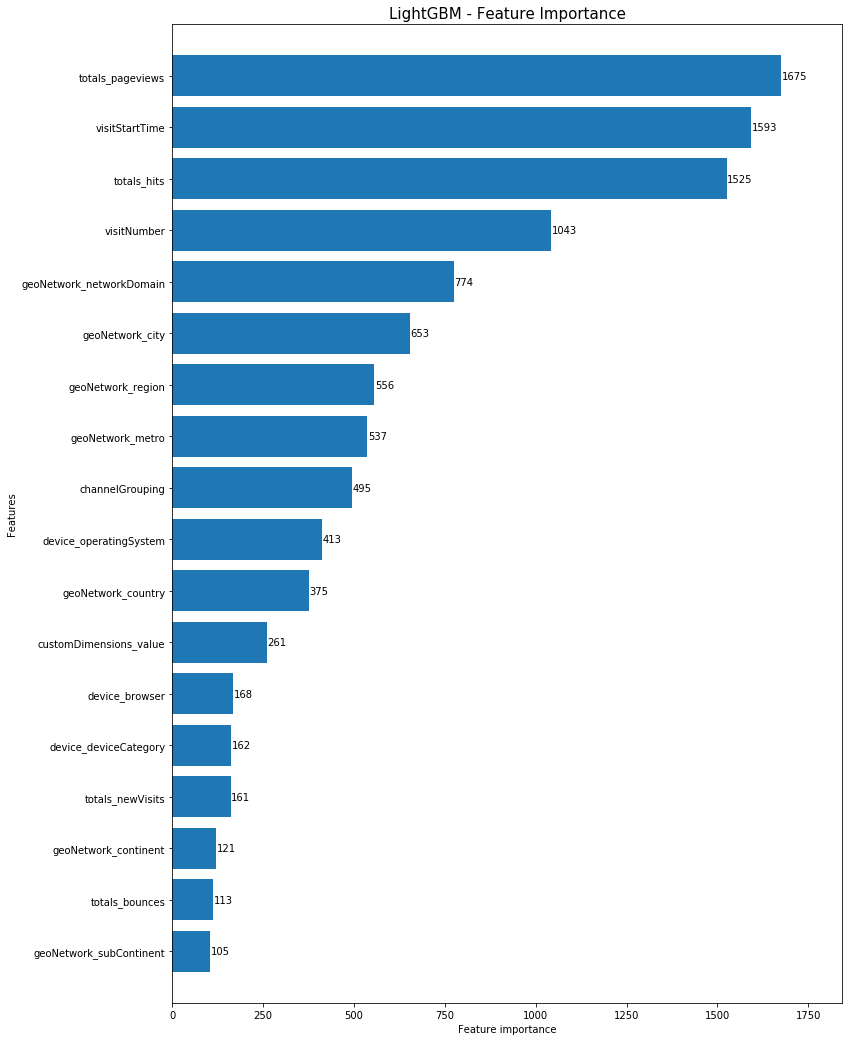

In [73]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()